In [1]:
import os
import sys

print(os.getcwd())
cwd0 = './config/'
sys.path.append(cwd0)

import visualID_Eng as vID
from visualID_Eng import color
vID.init(cwd0)
import tools4PytChem as t4p

/home/romuald/ENSEIGNEMENT/0-JupyterNotebooks/PytChem


**Start at:** Sunday 14 May 2023, 12:03:39  
**Hostname:** ip-sw-install-nico.insa-toulouse.fr (Linux)

<p style="text-align: center"><img width="800px" src="./config/svg/PytChemBanner.svg" style="margin-left:auto; margin-right:auto"/></p>

# Molecules

<div class="intro">
    
In order for chemists to rely on insights from cheminformatics, it is important to understand the way in which standard chemical softwares or computer libraries store and analyze chemical structure. Therefore, cheminformatics depends upon the **coding and the use of representations of molecular structures and related data** that are understandable both to human scientists and to machine algorithms, including **machine learning algorithms**.
    
Chemists most frequently think about **chemical structure in 2D**, whereas **molecules actually exist in 3D physical space**. 2D representations are designed to mimic the experience of drawing structural formulas on paper. 

The 3D conformation of a molecule, and the relative position of functional groups is however often of key importance since it determines its properties. Atomic coordinates may be determined experimentally (typically via x-ray crystallography), or calculated (using force-fields, quantum chemistry, molecular dynamics or composite models such as docking)

</div>
<br>
<div class="rq">

**<span style="color:red">Prerequisite.</span> Basic knowledge on:**
- chemical databases, such as [PubChem](https://pubchem.ncbi.nlm.nih.gov/) or [ChemSpider](https://www.chemspider.com/)
- the simplified molecular-input line-entry system (SMILES), which is a specification in the form of a line notation for describing the structure of chemical species using short ASCII strings ([wikipedia](https://en.wikipedia.org/wiki/Simplified_molecular-input_line-entry_system))

</div>

## 3D representation

<div class="intro">
    
3D modeling software are powerful tools that help many professionals create complex 3D graphics and visualize their work. In the field of chemistry, there is various software for molecular modeling and visualization. We will use in the present notebook the JSmol viewer widget. [JSmol](https://jmol.sourceforge.net/) returns a 3D representation of a molecule that may be used as a teaching tool, or for research e.g., in chemistry and biochemistry. It is a very powerful tool, with a nice GUI, and advanced tools that can be used by using its [rich scripting language](https://chemapps.stolaf.edu/jmol/docs/).

<p style="text-align:center;"><img src="./MiscImages/JMol-JSMol-logos.png" alt="JMol logos" width="200px"></p>

The [vChem3D website](https://vchem3d.univ-tlse3.fr/), made to teach chemistry in 3D, is fully based on JSMol.

</div>

In [2]:
#This is JSmol viewer widget which can be used in Jupyter Notebooks and JupyterLab
from jupyter_jsmol import JsmolView
from ipywidgets import Layout

### The Molfile format

<div class="intro">
MDL Molfile is a file format for holding information about the atoms, bonds, connectivity and coordinates of a molecule.
    
Let's first briefly see on an example how a Molfile looks like. It is the anisole molecule, downloaded from the [PubChem database](https://pubchem.ncbi.nlm.nih.gov/compound/Anisole).
</div>

In [3]:
anisoleMolFile = open("./Molecules-data/anisole.mol", "r")
print(anisoleMolFile.read())
anisoleMolFile.close()

7519
  -OEChem-05112309193D

 16 16  0     0  0  0  0  0  0999 V2000
    1.8925   -0.6211    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.5699   -0.3011   -0.0003 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.1759    1.0370   -0.0002 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.3918   -1.3114   -0.0001 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.1799    1.3647    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.7476   -0.9836    0.0001 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.1417    0.3545    0.0002 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.8227    0.4610    0.0003 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.8695    1.8709   -0.0003 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0910   -2.3555    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.4879    2.4064    0.0001 H   0  0  0  0  0  0  0  0  0  0  0  0
   -2.4966   -1.7702    0.0003 H   0  0  0  0  0  0  0  0  0  0  0  0
   -3.1974    0.6096    0.0003 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.7368    1.0652 

<div class="intro">

JSMol can nicely give an interactive representation of this MDL Molfile coding. 
</div>

In [4]:
JSMol = JsmolView(
    layout=Layout(height="300px", width="300px"), 
    info={'color':'#e2e2e2'}
)

display(JSMol)

JSMol.load_file("./Molecules-data/anisole.mol",inline=True)

JsmolView(layout=Layout(height='300px', width='300px'))

### The xyz format

<div class="intro">
The xyz file format is a simple format that usually gives the number of atoms in the first line, a comment on the second, followed by a number of lines with atomic symbols (or atomic numbers) and cartesian coordinates. There is no information about connectivity, so that graphical softwares that depict chemical structures in 3-dimensions only show the skeleton of a coumpound
</div>

In [5]:
anisolexyzFile = open("./Molecules-data/anisole.xyz", "r")
print(anisolexyzFile.read())
anisolexyzFile.close()

16
Saved after anisole.mol downloaded from PubChem
O       1.89250     -0.62110      0.00000
C       0.56990     -0.30110     -0.00030
C       0.17590      1.03700     -0.00020
C      -0.39180     -1.31140     -0.00010
C      -1.17990      1.36470      0.00000
C      -1.74760     -0.98360      0.00010
C      -2.14170      0.35450      0.00020
C       2.82270      0.46100      0.00030
H       0.86950      1.87090     -0.00030
H      -0.09100     -2.35550      0.00000
H      -1.48790      2.40640      0.00010
H      -2.49660     -1.77020      0.00030
H      -3.19740      0.60960      0.00030
H       2.73680      1.06520      0.90980
H       2.73730      1.06530     -0.90920
H       3.82670      0.02410      0.00050



In [6]:
JSMol = JsmolView(
    layout=Layout(height="300px", width="300px"), 
    info={'color':'#e2e2e2'}
)

display(JSMol)

JSMol.load_file("./Molecules-data/anisole.xyz",inline=True)

JsmolView(layout=Layout(height='300px', width='300px'))

### The cif format

<div class="intro">

Crystallographic Information File (CIF) is a standard text file format for representing crystallographic information, promulgated by the International Union of Crystallography (IUCr). Cristallographic data can be downloaded at CCDC, the free access being restricted to a [basic search interface](https://www.ccdc.cam.ac.uk/structures/?) - you primarily have to know the DOI of the article where the X-ray data were published. The totally free [Crystallography Open Database](http://www.crystallography.net/cod/search.html) also contains a lot of structures.
</div>

In [7]:
anisolexyzFile = open("./Molecules-data/1158630.cif", "r")
print(anisolexyzFile.read())
anisolexyzFile.close()

####################################################################### 
# 
# This file contains crystal structure data downloaded from the 
# Cambridge Structural Database (CSD) hosted by the Cambridge 
# Crystallographic Data Centre (CCDC).
# 
# Full information about CCDC data access policies and citation 
# guidelines are available at http://www.ccdc.cam.ac.uk/access/V1 
# 
# Audit and citation data items may have been added by the CCDC. 
# Please retain this information to preserve the provenance of 
# this file and to allow appropriate attribution of the data. 
# 
#######################################################################

data_FOJBOV03
#This CIF has been generated from an entry in the Cambridge Structural Database
_database_code_depnum_ccdc_archive 'CCDC 1158630'
_database_code_CSD               FOJBOV03
loop_
_citation_id
_citation_doi
_citation_year
1 10.1021/om00028a082 1993
_audit_creation_method           'Created from the CSD'
_audit_update_record             

In [8]:
JSMol = JsmolView(
    layout=Layout(height="300px", width="600px"), 
    info={'color':'#e2e2e2'}
)

display(JSMol)

JSMol.load_file("./Molecules-data/1158630.cif",inline=True)

JsmolView(layout=Layout(height='300px', width='600px'))

## RDKit, a toolkit for cheminformatics

<div class="intro">
    
```RDKit``` is a collection of cheminformatics and machine-learning software written in C++ and Python. It is designed to assist in the analysis and design of small molecules and chemical compounds. It provides a set of libraries and tools for the manipulation or analysis of:
- Molecular visualization
- Molecular fingerprints & descriptors
- Substructure searching
- Chemical reactions
- Enhanced stereochemistry
- Molecular standardization
- Conformation generation
- UFF and MMFF94/MMFF94S force fields, very useful for cleaning up molecular structures
- Shape-based similarity
- Molecule-molecule alignment
    
It reads and writes a lot of formats, including MDL Molfiles and SMILES.

```RDKit``` is widely used in academia, as well as in the pharmaceutical, biotech, and chemical industries for a variety of tasks such as virtual screening, lead optimization, and chemical database management. Regular updates are released at 6 months intervals.

It has a very good integration with Jupyter and pandas.The easiest way to install it in your conda environment is to run the command:
```bash
pip install rdkit
```

  
There are nice online documentations:
- you can first start with the [Getting Started with the RDKit in Python document](https://www.rdkit.org/docs/GettingStartedInPython.html)
- an [RDKit cookbook](https://www.rdkit.org/docs/Cookbook.html) provides example recipes of how to carry out particular tasks using the RDKit functionality from Python

The present Jupyter notebook is inspired from these two documents and from the [RDKit basics notebook of EPFL](https://github.com/schwallergroup/ai4chem_course/blob/main/notebooks/01%20-%20Basics/01d_rdkit_basics.ipynb).

</div>

Let's first start importing relevant modules. The majority of the basic molecular functionality is found in module [rdkit.Chem](https://www.rdkit.org/docs/source/rdkit.Chem.html#module-rdkit.Chem)

In [9]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

from rdkit import Chem
from rdkit.Chem import Draw, AllChem

#cancel the "last operation show-up" specific of Jupyter notebooks
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### SMILES format

<div class="intro">
    
SMILES refers to a line notation for encoding molecular structures, using chemical symbols, and specifying bonds, rings, branching, aromaticity and even stereochemistry or isotopes. ```CC```, ```C=C```, ```C#C``` stand for ethane, ethene and ethyne, respectively. Typically, a number of equally valid SMILES strings can be written for a molecule. For example, ```CCO```, ```OCC``` and ```C(O)C``` all specify the structure of ethanol.

</div>

#### Creating molecules

<div class="intro">

The methoxybenzene molecule, also known as anisole, a colorless liquid with a smell reminiscent of anise seed, will be used in the first part of this notebook. Ring structures are written by breaking each ring at an **arbitrary point**, and adding numerical ring closure labels to show connectivity between non-adjacent atoms. For example, cyclohexane may be written as ```C1CCCCC1```. 

One possible SMILES description for anisole is: ```C1=CC(OC)=CC=C1```. Let's check that and let's also see the difference with ```C1=CC(CO)=CC=C1```: 
    
</div>

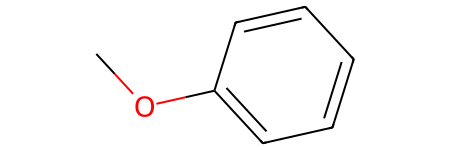

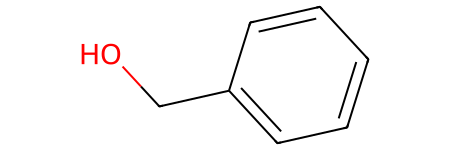

In [10]:
Chem.MolFromSmiles('C1=C(OC)C=CC=C1')
Chem.MolFromSmiles('C1=C(CO)C=CC=C1')

<div class="intro">

A ```Mol``` ```RDKit``` object has actually been created by calling ```Chem.MolFromSmiles```. It can be stored into a variable representing anisole. It seems quite convenient to call it ```anisole```. The value of this variable can be displayed in the notebook by typing its name and then running the cell. 
    
</div>

rdkit.Chem.rdchem.Mol

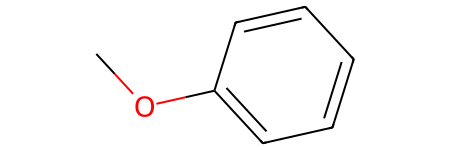

In [11]:
anisole = Chem.MolFromSmiles('C1=C(OC)C=CC=C1')
type(anisole)
anisole

<div class="rq">
    
The 3D mol format has nothing to do with the ```Mol``` type of RDKit objects
    
</div>

#### Canonicalization

<div class="intro">
    
Different SMILES can represent the same molecule. This is a big problem in the context of cheminformatics, where you want unambiguous and unique compound descriptors. To do this, we can apply a canonicalization process. This concept refers to the generation of a unique SMILES for each molecule. We can use the ```MolToSmiles``` function in ```RDKit``` to get the SMILES of a ```Mol``` object. By default, ```RDKit``` canonicalizes the SMILES when applying this function.
    
</div>
<br>
<div class="rq">
    
**<span style="color:red">Warning.</span>** ```MolToSmiles``` returns a string 
    
</div>

str

'COc1ccccc1'

rdkit.Chem.rdchem.Mol

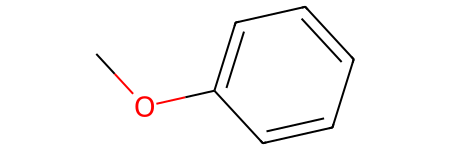

In [12]:
anisoleCan=Chem.MolToSmiles(anisole)
type(anisoleCan)
anisoleCan #is a string at this step
anisoleCan = Chem.MolFromSmiles(anisoleCan)
type(anisoleCan) # it is now an RDKit Mol object
anisoleCan #plot in 2D

<div class="rq">
    
**There is no standard canonicalization**. The resulting SMILES will depend on the cheminformatics toolkit and the version that is used. If you want to perform a comparison/similarity/machine learning study using SMILES, you must first apply the same canonicalization process to ALL the molecules of interest.
    
</div>

#### Conversion from MDL Molfile to SMILES

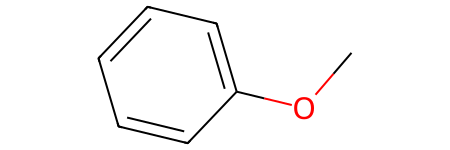

rdkit.Chem.rdchem.Mol

In [13]:
# reading of a mol file 
anisole = Chem.MolFromMolFile('./Molecules-data/anisole.mol')
anisole
# again, the Mol type of anisole has nothing to do with the MDL molfile format
type(anisole)

<div class="intro">
    
Single molecules can be converted to text using several functions present in the ```rdkit.Chem``` module
    
</div>

In [14]:
Chem.MolToSmiles(anisole)

'COc1ccccc1'

<div class="intro">
    
If you’d like to have the Kekule form of the SMILES, first Kekulize the molecule, then use the “kekuleSmiles” option    
</div>

'COC1=CC=CC=C1'

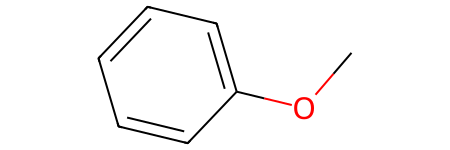

In [15]:
Chem.Kekulize(anisole)
Chem.MolToSmiles(anisole,kekuleSmiles=True)
# It changes nothing to the 2D drawing
anisole

#### Conversion from SMILES to MDL Mol format 

<div class="intro">

MDL Mol blocks are also available, but hydrogen atoms are not infered in the first place, it's only the skeleton that is expanded into a 3D space. Let's see that for cyclobutane:
</div>

In [16]:
cyclobutane = Chem.MolFromSmiles('C1CCC1')
print(Chem.MolToMolBlock(cyclobutane))


     RDKit          2D

  4  4  0  0  0  0  0  0  0  0999 V2000
    1.0607    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0000   -1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0607    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  3  4  1  0
  4  1  1  0
M  END



<div class="intro">

To visualize it with the JSMol viewer widget and its ```load_str``` tool, this MolFile format must be converted as a string
</div>

In [17]:
JSMol = JsmolView(
    layout=Layout(height="300px", width="300px"), 
    info={'color':'#e2e2e2'}
)
display(JSMol)
JSMol.load_str(str(Chem.MolToMolBlock(cyclobutane)))

JsmolView(layout=Layout(height='300px', width='300px'))

<div class="intro">

Now, add hydrogen atoms
</div>


     RDKit          2D

 12 12  0  0  0  0  0  0  0  0999 V2000
    1.0607    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0000   -1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0607    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.1213    1.0607    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.1213   -1.0607    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    1.0607   -2.1213    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0607   -2.1213    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -2.1213   -1.0607    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -2.1213    1.0607    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0607    2.1213    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    1.0607    2.1213    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  3  4  1  0
  4  1  1  0
  1  5  1  0
  1  6  1  0
  2  7  1  0
  2 

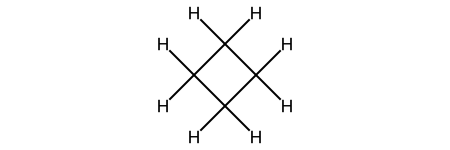

In [18]:
cyclobutaneH = Chem.AddHs(cyclobutane)
print(Chem.MolToMolBlock(cyclobutaneH))
cyclobutaneH

In [19]:
JSMol = JsmolView(
    layout=Layout(height="300px", width="300px"), 
    info={'color':'#e2e2e2'}
)
display(JSMol)
JSMol.load_str(str(Chem.MolToMolBlock(cyclobutaneH)))

JsmolView(layout=Layout(height='300px', width='300px'))

<div class="rq">
    
Cyclobutane is planar! It must be cleaned.
    
</div>

<div class="intro">

Cleaning of the structure, using the so-called ETKDG method. **This is not a geometry optimization baed on the minimzation of the energy of the molecule!**
</div>

0


     RDKit          3D

 12 12  0  0  0  0  0  0  0  0999 V2000
    0.4280    0.9580   -0.0542 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.9494   -0.4476    0.0775 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.4453   -0.9477   -0.1840 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.9600    0.4286    0.2195 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.8336    1.6583    0.6806 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.5192    1.3314   -1.1071 H   0  0  0  0  0  0  0  0  0  0  0  0
    1.6987   -0.6701   -0.7153 H   0  0  0  0  0  0  0  0  0  0  0  0
    1.3564   -0.7346    1.0500 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7635   -1.7281    0.5135 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.5819   -1.1411   -1.2610 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.7380    0.7914   -0.4921 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.2964    0.5016    1.2727 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  3  4  1  0
  4  1  1  0
  1  5  1  0
  1  6  1  0
  2  7  1  0
  2 

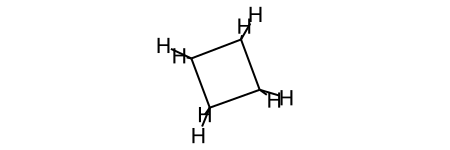

In [20]:
AllChem.EmbedMolecule(cyclobutaneH)
print(Chem.MolToMolBlock(cyclobutaneH))
cyclobutaneH

In [21]:
JSMol = JsmolView(
    layout=Layout(height="300px", width="300px"), 
    info={'color':'#e2e2e2'}
)
display(JSMol)
JSMol.load_str(str(Chem.MolToMolBlock(cyclobutaneH)))

JsmolView(layout=Layout(height='300px', width='300px'))

<div class="rq">
    
That's much better. In summary, it is possible, starting from a 2D SMILES coding, to end-up with a plausible 3D structure candidate.
    
</div>

### Playing with an RDKit Mol Object

<div class="intro">

An  ```RDKit Mol``` object is actually a graph representing the molecule. In this graph, vertices represents the atoms and edges the bonds in the molecule. Therefore, atoms and bonds can be retrieved from this object

</div>

In [22]:
#Get total number of atoms
n_atoms = anisoleCan.GetNumAtoms()
print(f'Number of atoms: {n_atoms}')
#Get total number of sigma bonds, i.e. the sigma skeleton of the molecule
n_bonds = anisoleCan.GetNumBonds()
print(f'Number of bonds: {n_bonds}')
print()

#create a list containing the atoms of the molecule
atoms = list(anisoleCan.GetAtoms())
#print the atomic number, atomicsymbol and hybridization for each atom in the molecule
for i,atom in enumerate(atoms):
    print(f"Atom {i:3}: {atom.GetAtomicNum():3} {atom.GetSymbol():>2} {atom.GetHybridization()}")

Number of atoms: 8
Number of bonds: 8

Atom   0:   6  C SP3
Atom   1:   8  O SP2
Atom   2:   6  C SP2
Atom   3:   6  C SP2
Atom   4:   6  C SP2
Atom   5:   6  C SP2
Atom   6:   6  C SP2
Atom   7:   6  C SP2


In [23]:
#create a list containing the bonds in the molecule
bonds = list(anisoleCan.GetBonds())
for i,bond in enumerate(bonds):
    print(f"Bond {i:3}: {bond.GetBeginAtomIdx():3}({bond.GetBeginAtom().GetSymbol():>2})-{bond.GetEndAtomIdx()}({bond.GetEndAtom().GetSymbol():>2}), {bond.GetBondType()} ")

Bond   0:   0( C)-1( O), SINGLE 
Bond   1:   1( O)-2( C), SINGLE 
Bond   2:   2( C)-3( C), AROMATIC 
Bond   3:   3( C)-4( C), AROMATIC 
Bond   4:   4( C)-5( C), AROMATIC 
Bond   5:   5( C)-6( C), AROMATIC 
Bond   6:   6( C)-7( C), AROMATIC 
Bond   7:   7( C)-2( C), AROMATIC 


### Substructure search and highlight

<div class="intro">

Atoms in a molecule can be highlighted by drawing a coloured solid or open circle around them, and bonds likewise can have a coloured outline applied. An obvious use is to show atoms and bonds that have matched a substructure query. The process in RDKit is based on [SMILES arbitrary target specification (SMARTS)](https://en.wikipedia.org/wiki/SMILES_arbitrary_target_specification), a language for describing molecular pattern.
    
Substructure searching, the process of finding a particular pattern (subgraph) in a molecule (graph), is one of the most important tasks for computers in chemistry. It is used in virtually every application that employs a digital representation of a molecule, including depiction (to highlight a particular functional group), drug design (searching a database for similar structures and activity), analytical chemistry (looking for previously-characterized structures and comparing their data to that of an unknown), and a host of other problems.

SMARTS is a language that allows you to specify substructures using rules that are straightforward extensions of SMILES. For example, to search a database for phenol-containing structures, one would use the SMARTS string [OH]c1ccccc1 ([introduction copied from daylight.com](https://www.daylight.com/dayhtml/doc/theory/theory.smarts.html))

</div>

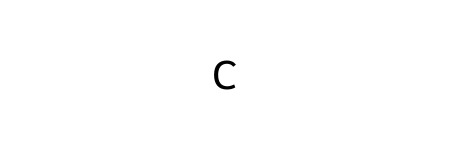

True

((2,), (3,), (4,), (5,), (6,), (7,))


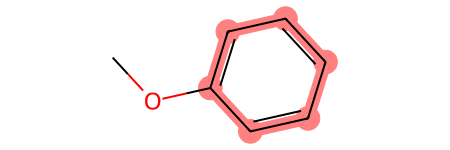

In [24]:
substructure = Chem.MolFromSmarts('c') #aromatic carbons
substructure
anisoleCan.HasSubstructMatch(substructure)
m = anisoleCan.GetSubstructMatches(substructure)
print(m)
anisoleCan

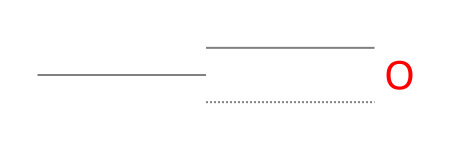

True

((0, 1),)


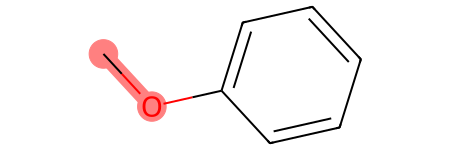

In [25]:
substructure = Chem.MolFromSmarts('CO')  #CO, where is C is not aromatic
substructure
anisoleCan.HasSubstructMatch(substructure)
m = anisoleCan.GetSubstructMatches(substructure)
print(m)
anisoleCan

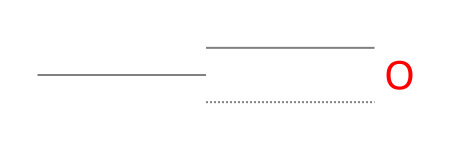

True

((2, 1),)


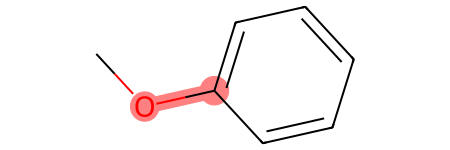

In [26]:
substructure = Chem.MolFromSmarts('cO')  #CO, where is C is aromatic
substructure
anisoleCan.HasSubstructMatch(substructure)
m = anisoleCan.GetSubstructMatches(substructure)
print(m)
anisoleCan

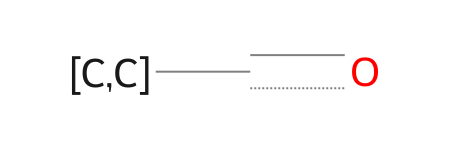

True

((0, 1), (2, 1))


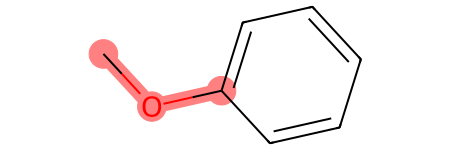

In [27]:
substructure = Chem.MolFromSmarts('[C,c]O')  #CO, where is C is aromatic or not
substructure
anisoleCan.HasSubstructMatch(substructure)
m = anisoleCan.GetSubstructMatches(substructure)
print(m)
anisoleCan

### Fingerprints

<div class="intro">

ML algorithms usually take vectors as inputs and operate with them. 3D or 2D descriptors must be put into a vector form, without loosing their meaning. It is the case with molecules. How can we transform them into numbers to feed our ML algorithms?

One common option is using molecular fingerprints. We will use here the so-called Morgan Fingerprint, that describes molecules as bit arrays (arrays of 1s and 0s).
    
</div>

In [28]:
anisoleFp = AllChem.GetMorganFingerprintAsBitVect(anisoleCan, 2, nBits=1024) #2 means radius=2 and nBits is the number of bits (length) of the fingerprint

print(anisoleFp.GetNumBits()) #print vector length

anisoleFPL = anisoleFp.ToList() #visualize vector as list.
print(anisoleFPL)

1024
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0

<div class="rq">
    
The canonicalized SMILES of anisole is now available as a 1D vector fingerprint, that can be used as an input vector in an ML framework.
    
</div>

### Reading and using molecular databases with SMILES encoding, using pandas

<div class="intro">

*En route* toward data science and machine learning, thanks to the coupling between ```RDKit``` and ```pandas```! We will use a csv file that contains organic molecules and several data, mainly obtained from quantum chemistry calculations (DFT/B3LYP/6-31G(2df,p)). It is a small selection of the [GDB-9 134k molecules database](https://datarepository.wolframcloud.com/resources/GDB9-Database/), aiming at benchmarking existing methods, developing new methods, such as hybrid quantum mechanics/machine learning, and systematic identifying structure-property relationships ([doi: 10.1038/sdata.2014.22](https://www.nature.com/articles/sdata201422)).
    
Importing ```pandasTools``` enables several features that allow for using RDKit molecules as columns of a Pandas dataframe
</div>

In [29]:
from rdkit.Chem import PandasTools

#### Read the database

In [30]:
df = pd.read_csv('./Molecules-data/dsgdb9-299xtr.csv',sep="\t")
display(df)
df.count()
display(df.describe().style.format("{0:.2f}"))

dsgdb9 ID symmetry point group   composition  mu / D  alpha / bohr^3   
0        82308                   C1     C8 N1 H15  1.4253           87.43  \
1        21686                   C1   N2 C5 O1 H4  2.8250           64.94   
2        66343                   C1     O2 C7 H10  2.8472           78.03   
3        38467                   C1   C7 O1 N1 H9  1.3657           75.34   
4        36951                   C1     C7 O2 H12  0.0153           78.04   
..         ...                  ...           ...     ...             ...   
294     128341                   C2      C4 N5 H9  1.4142           76.46   
295      36698                   C1      N3 C6 H9  5.6677           77.11   
296      56318                   C1     C6 O3 H10  5.9204           74.71   
297      52249                   C1  O1 C7 N1 H11  3.6826           79.28   
298     105360                   C1      O3 C6 H8  3.1133           68.26   

     E(HOMO) / eV  E(LUMO) / eV  chemical hardness / eV  zpve / eV   
0       -6.019159      2.062623                8.081782   5.929987  \
1       -6.386512     -0.598650                5.787862   2.286001   
2       -6.745703     -1.131994                5.613709   4.336978   
3       -6.253177      0.691169                6.944346   4.082361   
4       -6.710328      1.814999                8.525327   4.978378   
..            ...           ...                     ...        ...   
294     -5.036828      0.612256                5.649084   4.061191   
295     -6.421887      0.772803                7.194691   4.056891   
296     -6.979721     -0.574160                6.405560   4.226364   
297     -6.636857      0.887091                7.523948   4.681338   
298     -7.053191     -1.159205                5.893986   3.658516   

     U(0K) / kcal.mol-1  U(298.15K) / kcal.mol-1  H(298.15K) / kcal.mol-1   
0        -231177.406281           -231171.633194           -231171.040198  \
1        -236875.947200           -236871.580989           -236870.988620   
2        -265470.537995           -265465.252483           -265464.660114   
3        -252109.268673           -252105.556327           -252104.963958   
4        -266174.183821           -266168.487290           -266167.894921   
..                  ...                      ...                      ...   
294      -270731.361562           -270725.306723           -270724.714354   
295      -249797.873293           -249792.641747           -249792.049378   
296      -288785.425973           -288778.697816           -288778.105447   
297      -252976.147284           -252970.682304           -252970.089935   
298      -287976.920176           -287971.707455           -287971.115086   

     G(298.15K) / kcal.mol-1  Cv(298.15K) / cal.mol-1.K-1   
0             -231198.053226                       37.154  \
1             -236895.374266                       26.304   
2             -265491.231375                       32.593   
3             -252127.942728                       26.543   
4             -266196.928529                       31.794   
..                       ...                          ...   
294           -270753.497586                       33.428   
295           -249819.110724                       30.898   
296           -288809.836719                       35.355   
297           -252997.781300                       32.422   
298           -287997.636774                       31.063   

            SMILES BASIC                          SMILES STEREO   
0        CC1N2CC2CC1(C)C                C[C@H]1N2C[C@H]2CC1(C)C  \
1          NC1=NOC=C1C#C                            Nc1nocc1C#C   
2        OC1(CCCC=C1)C=O                     O[C@]1(CCCC=C1)C=O   
3    C1C2OC34CN(C3)C1C24  C1[C@H]2O[C@@]34CN(C3)[C@@H]1[C@@H]24   
4        C(C1COC1)C1COC1                        C(C1COC1)C1COC1   
..                   ...                                    ...   
294        CNC1=NNN=C1NC                         CNc1n[nH]nc1NC   
295       N#CCNC1CC2NC12            N#CCN[C@H

dsgdb9 ID                      299
symmetry point group           299
composition                    299
mu / D                         299
alpha / bohr^3                 299
E(HOMO) / eV                   299
E(LUMO) / eV                   299
chemical hardness / eV         299
zpve / eV                      299
U(0K) / kcal.mol-1             299
U(298.15K) / kcal.mol-1        299
H(298.15K) / kcal.mol-1        299
G(298.15K) / kcal.mol-1        299
Cv(298.15K) / cal.mol-1.K-1    299
SMILES BASIC                   299
SMILES STEREO                  299
InChi1                         299
InChi2                         299
dtype: int64

#### Create new columns with RDKit objects or properties

<div class="intro">

A new column can be created holding the respective RDKit molecule objects. Fingerprints can be included to accelerate substructure searches on the dataframe. The 'SMILES BASIC' data in the df dataframe will be converted into  ```mol``` objects that can be processed by RDKit. You can do this using the ```PandasTools.AddMoleculeColumnToFrame``` function.
    
But we will first apply the same canonicalization operation to all the examples we have in the dataframe, using the aptly named ```apply()``` function.
</div>

In [31]:
def canonicalize_smiles(smiles):
    '''This function takes a non-canonical SMILES and returns the canonical version
    
    Args: 
        -smiles: str, non-canonical SMILES of a molecule
    
    Out:
        - canonical_smiles: str, canonical SMILES of the molecule
    '''
    
    mol = Chem.MolFromSmiles(smiles) #create a mol object from input smiles.
    can = Chem.MolToSmiles(mol) #convert the previous mol object to SMILES. By default, RDKit canonicalizes the SMILES when applying this MolToSmiles() function

    return can

df['CANONICAL SMILES BASIC'] = df['SMILES BASIC'].apply(canonicalize_smiles)
display(df)

dsgdb9 ID symmetry point group   composition  mu / D  alpha / bohr^3   
0        82308                   C1     C8 N1 H15  1.4253           87.43  \
1        21686                   C1   N2 C5 O1 H4  2.8250           64.94   
2        66343                   C1     O2 C7 H10  2.8472           78.03   
3        38467                   C1   C7 O1 N1 H9  1.3657           75.34   
4        36951                   C1     C7 O2 H12  0.0153           78.04   
..         ...                  ...           ...     ...             ...   
294     128341                   C2      C4 N5 H9  1.4142           76.46   
295      36698                   C1      N3 C6 H9  5.6677           77.11   
296      56318                   C1     C6 O3 H10  5.9204           74.71   
297      52249                   C1  O1 C7 N1 H11  3.6826           79.28   
298     105360                   C1      O3 C6 H8  3.1133           68.26   

     E(HOMO) / eV  E(LUMO) / eV  chemical hardness / eV  zpve / eV   
0       -6.019159      2.062623                8.081782   5.929987  \
1       -6.386512     -0.598650                5.787862   2.286001   
2       -6.745703     -1.131994                5.613709   4.336978   
3       -6.253177      0.691169                6.944346   4.082361   
4       -6.710328      1.814999                8.525327   4.978378   
..            ...           ...                     ...        ...   
294     -5.036828      0.612256                5.649084   4.061191   
295     -6.421887      0.772803                7.194691   4.056891   
296     -6.979721     -0.574160                6.405560   4.226364   
297     -6.636857      0.887091                7.523948   4.681338   
298     -7.053191     -1.159205                5.893986   3.658516   

     U(0K) / kcal.mol-1  U(298.15K) / kcal.mol-1  H(298.15K) / kcal.mol-1   
0        -231177.406281           -231171.633194           -231171.040198  \
1        -236875.947200           -236871.580989           -236870.988620   
2        -265470.537995           -265465.252483           -265464.660114   
3        -252109.268673           -252105.556327           -252104.963958   
4        -266174.183821           -266168.487290           -266167.894921   
..                  ...                      ...                      ...   
294      -270731.361562           -270725.306723           -270724.714354   
295      -249797.873293           -249792.641747           -249792.049378   
296      -288785.425973           -288778.697816           -288778.105447   
297      -252976.147284           -252970.682304           -252970.089935   
298      -287976.920176           -287971.707455           -287971.115086   

     G(298.15K) / kcal.mol-1  Cv(298.15K) / cal.mol-1.K-1   
0             -231198.053226                       37.154  \
1             -236895.374266                       26.304   
2             -265491.231375                       32.593   
3             -252127.942728                       26.543   
4             -266196.928529                       31.794   
..                       ...                          ...   
294           -270753.497586                       33.428   
295           -249819.110724                       30.898   
296           -288809.836719                       35.355   
297           -252997.781300                       32.422   
298           -287997.636774                       31.063   

            SMILES BASIC                          SMILES STEREO   
0        CC1N2CC2CC1(C)C                C[C@H]1N2C[C@H]2CC1(C)C  \
1          NC1=NOC=C1C#C                            Nc1nocc1C#C   
2        OC1(CCCC=C1)C=O                     O[C@]1(CCCC=C1)C=O   
3    C1C2OC34CN(C3)C1C24  C1[C@H]2O[C@@]34CN(C3)[C@@H]1[C@@H]24   
4        C(C1COC1)C1COC1                        C(C1COC1)C1COC1   
..                   ...                                    ...   
294        CNC1=NNN=C1NC                         CNc1n[nH]nc1NC   
295       N#CCNC1CC2NC12            N#CCN[C@H

dsgdb9 ID symmetry point group   composition  mu / D  alpha / bohr^3   
0        82308                   C1     C8 N1 H15  1.4253           87.43  \
1        21686                   C1   N2 C5 O1 H4  2.8250           64.94   
2        66343                   C1     O2 C7 H10  2.8472           78.03   
3        38467                   C1   C7 O1 N1 H9  1.3657           75.34   
4        36951                   C1     C7 O2 H12  0.0153           78.04   
..         ...                  ...           ...     ...             ...   
294     128341                   C2      C4 N5 H9  1.4142           76.46   
295      36698                   C1      N3 C6 H9  5.6677           77.11   
296      56318                   C1     C6 O3 H10  5.9204           74.71   
297      52249                   C1  O1 C7 N1 H11  3.6826           79.28   
298     105360                   C1      O3 C6 H8  3.1133           68.26   

     E(HOMO) / eV  E(LUMO) / eV  chemical hardness / eV  zpve / eV   
0       -6.019159      2.062623                8.081782   5.929987  \
1       -6.386512     -0.598650                5.787862   2.286001   
2       -6.745703     -1.131994                5.613709   4.336978   
3       -6.253177      0.691169                6.944346   4.082361   
4       -6.710328      1.814999                8.525327   4.978378   
..            ...           ...                     ...        ...   
294     -5.036828      0.612256                5.649084   4.061191   
295     -6.421887      0.772803                7.194691   4.056891   
296     -6.979721     -0.574160                6.405560   4.226364   
297     -6.636857      0.887091                7.523948   4.681338   
298     -7.053191     -1.159205                5.893986   3.658516   

     U(0K) / kcal.mol-1  U(298.15K) / kcal.mol-1  H(298.15K) / kcal.mol-1   
0        -231177.406281           -231171.633194           -231171.040198  \
1        -236875.947200           -236871.580989           -236870.988620   
2        -265470.537995           -265465.252483           -265464.660114   
3        -252109.268673           -252105.556327           -252104.963958   
4        -266174.183821           -266168.487290           -266167.894921   
..                  ...                      ...                      ...   
294      -270731.361562           -270725.306723           -270724.714354   
295      -249797.873293           -249792.641747           -249792.049378   
296      -288785.425973           -288778.697816           -288778.105447   
297      -252976.147284           -252970.682304           -252970.089935   
298      -287976.920176           -287971.707455           -287971.115086   

     G(298.15K) / kcal.mol-1  Cv(298.15K) / cal.mol-1.K-1   
0             -231198.053226                       37.154  \
1             -236895.374266                       26.304   
2             -265491.231375                       32.593   
3             -252127.942728                       26.543   
4             -266196.928529                       31.794   
..                       ...                          ...   
294           -270753.497586                       33.428   
295           -249819.110724                       30.898   
296           -288809.836719                       35.355   
297           -252997.781300                       32.422   
298           -287997.636774                       31.063   

            SMILES BASIC                          SMILES STEREO   
0        CC1N2CC2CC1(C)C                C[C@H]1N2C[C@H]2CC1(C)C  \
1          NC1=NOC=C1C#C                            Nc1nocc1C#C   
2        OC1(CCCC=C1)C=O                     O[C@]1(CCCC=C1)C=O   
3    C1C2OC34CN(C3)C1C24  C1[C@H]2O[C@@]34CN(C3)[C@@H]1[C@@H]24   
4        C(C1COC1)C1COC1                        C(C1COC1)C1COC1   
..                   ...                                    ...   
294        CNC1=NNN=C1NC                         CNc1n[nH]nc1NC   
295       N#CCNC1CC2NC12            N#CCN[C@H
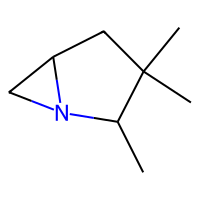
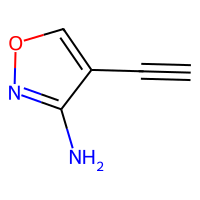
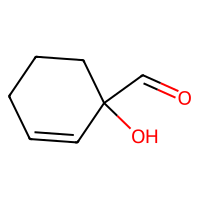
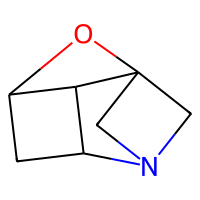
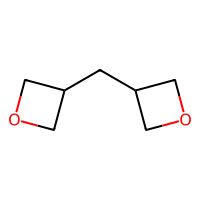
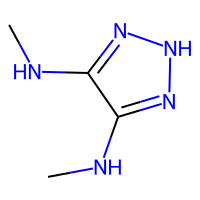
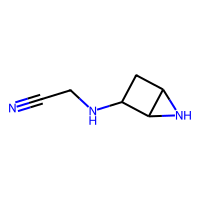
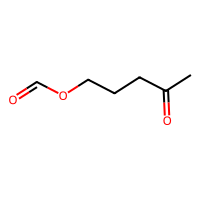
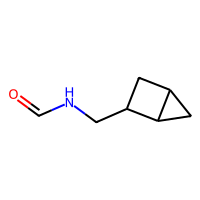
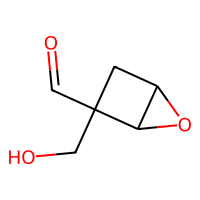

In [32]:
PandasTools.AddMoleculeColumnToFrame(df, smilesCol='CANONICAL SMILES BASIC',includeFingerprints=True,molCol='Molecule')
display(df)

<div class="intro">

We will now use the ```apply()``` function to compute the molecular weight of all our molecules. This function takes a ```mol``` object as input and returns its molecular weight.
</div>

In [33]:
from rdkit.Chem.Descriptors import MolWt
df['MW'] = df['Molecule'].apply(MolWt)
display(df)

dsgdb9 ID symmetry point group   composition  mu / D  alpha / bohr^3   
0        82308                   C1     C8 N1 H15  1.4253           87.43  \
1        21686                   C1   N2 C5 O1 H4  2.8250           64.94   
2        66343                   C1     O2 C7 H10  2.8472           78.03   
3        38467                   C1   C7 O1 N1 H9  1.3657           75.34   
4        36951                   C1     C7 O2 H12  0.0153           78.04   
..         ...                  ...           ...     ...             ...   
294     128341                   C2      C4 N5 H9  1.4142           76.46   
295      36698                   C1      N3 C6 H9  5.6677           77.11   
296      56318                   C1     C6 O3 H10  5.9204           74.71   
297      52249                   C1  O1 C7 N1 H11  3.6826           79.28   
298     105360                   C1      O3 C6 H8  3.1133           68.26   

     E(HOMO) / eV  E(LUMO) / eV  chemical hardness / eV  zpve / eV   
0       -6.019159      2.062623                8.081782   5.929987  \
1       -6.386512     -0.598650                5.787862   2.286001   
2       -6.745703     -1.131994                5.613709   4.336978   
3       -6.253177      0.691169                6.944346   4.082361   
4       -6.710328      1.814999                8.525327   4.978378   
..            ...           ...                     ...        ...   
294     -5.036828      0.612256                5.649084   4.061191   
295     -6.421887      0.772803                7.194691   4.056891   
296     -6.979721     -0.574160                6.405560   4.226364   
297     -6.636857      0.887091                7.523948   4.681338   
298     -7.053191     -1.159205                5.893986   3.658516   

     U(0K) / kcal.mol-1  ...  H(298.15K) / kcal.mol-1   
0        -231177.406281  ...           -231171.040198  \
1        -236875.947200  ...           -236870.988620   
2        -265470.537995  ...           -265464.660114   
3        -252109.268673  ...           -252104.963958   
4        -266174.183821  ...           -266167.894921   
..                  ...  ...                      ...   
294      -270731.361562  ...           -270724.714354   
295      -249797.873293  ...           -249792.049378   
296      -288785.425973  ...           -288778.105447   
297      -252976.147284  ...           -252970.089935   
298      -287976.920176  ...           -287971.115086   

     G(298.15K) / kcal.mol-1  Cv(298.15K) / cal.mol-1.K-1   
0             -231198.053226                       37.154  \
1             -236895.374266                       26.304   
2             -265491.231375                       32.593   
3             -252127.942728                       26.543   
4             -266196.928529                       31.794   
..                       ...                          ...   
294           -270753.497586                       33.428   
295           -249819.110724                       30.898   
296           -288809.836719                       35.355   
297           -252997.781300                       32.422   
298           -287997.636774                       31.063   

            SMILES BASIC                          SMILES STEREO   
0        CC1N2CC2CC1(C)C                C[C@H]1N2C[C@H]2CC1(C)C  \
1          NC1=NOC=C1C#C                            Nc1nocc1C#C   
2        OC1(CCCC=C1)C=O                     O[C@]1(CCCC=C1)C=O   
3    C1C2OC34CN(C3)C1C24  C1[C@H]2O[C@@]34CN(C3)[C@@H]1[C@@H]24   
4        C(C1COC1)C1COC1                        C(C1COC1)C1COC1   
..                   ...                                    ...   
294        CNC1=NNN=C1NC                         CNc1n[nH]nc1NC   
295       N#CCNC1CC2NC12            N#CCN[C@H]1C[C@H]2N[C@@H]12   
296        CC(=O)CCCOC=O                          CC(=O)CCCOC=O   
297       O=CNCC1CC2CC12            O=CNC[C@H]1C[C@H]2C[C@@H]12   
298     OCC1(CC2OC12)C=O           OC[C@]1(C[C@H]2O[C@@H]12)C=O   

                

#### Visualize the molecules in a grid

In [34]:
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.bondLineWidth=2
#FrameToGridImage: Draw grid image of mols in pandas DataFrame
PandasTools.FrameToGridImage(df, molsPerRow=3, column='Molecule', legendsCol='MW', useSVG=True, subImgSize=(400, 200), maxMols=df.shape[0])

#### Select molecules that match a pattern and visualize them on a grid 

In [35]:
substructure = Chem.MolFromSmarts('[#7]') #N-containing compounds
df['N'] = df['Molecule'].apply(lambda x: x.HasSubstructMatch(substructure))
df_N = df[df['N']]
print(f'There are {len(df_N)} molecules containing at least one nitrogen atom')

PandasTools.FrameToGridImage(df_N, molsPerRow=3, column='Molecule', legendsCol='MW', useSVG=True, subImgSize=(400, 200), maxMols=df.shape[0])

There are 191 molecules containing at least one nitrogen atom


## End

In [36]:
vID.end(cwd0)

**End at:** Sunday 14 May 2023, 12:04:32  
**Duration:** 00:00:53 508ms

<p style="text-align: center"><img width="800px" src="./config/svg/logoEnd.svg" style="margin-left:auto; margin-right:auto"/></p>